<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/College_Student_Placement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dataset**

In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vrajesh0sharma7/college-student-placement")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'college-student-placement' dataset.
Path to dataset files: /kaggle/input/college-student-placement


In [33]:
import numpy as np
import pandas as pd

df = pd.read_csv(path + "/CollegePlacement.csv")
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [34]:
df.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No
9999,CLG0060,109,9.41,9.77,8,No,3,5,5,No


In [35]:
df.shape

(10000, 10)

In [36]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [37]:
df.isnull().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [38]:
df['Placement'].value_counts()

,count
Placement,
No,8341
Yes,1659


**Data Preprocessing**

In [39]:
df.drop("College_ID", axis=1, inplace=True)
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


In [40]:
df['Internship_Experience'] = df['Internship_Experience'].map({'Yes': 1, 'No': 0})
df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0})

df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,0.396400,4.970900,5.561800,2.513400,0.165900
std,15.053101,1.447519,1.470141,2.873477,0.489174,3.160103,2.900866,1.715959,0.372009
min,41.000000,5.000000,4.540000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,0.000000,2.000000,3.000000,1.000000,0.000000
50%,99.000000,7.560000,7.550000,6.000000,0.000000,5.000000,6.000000,3.000000,0.000000
75%,110.000000,8.790000,8.770000,8.000000,1.000000,8.000000,8.000000,4.000000,0.000000
max,158.000000,10.000000,10.460000,10.000000,1.000000,10.000000,10.000000,5.000000,1.000000


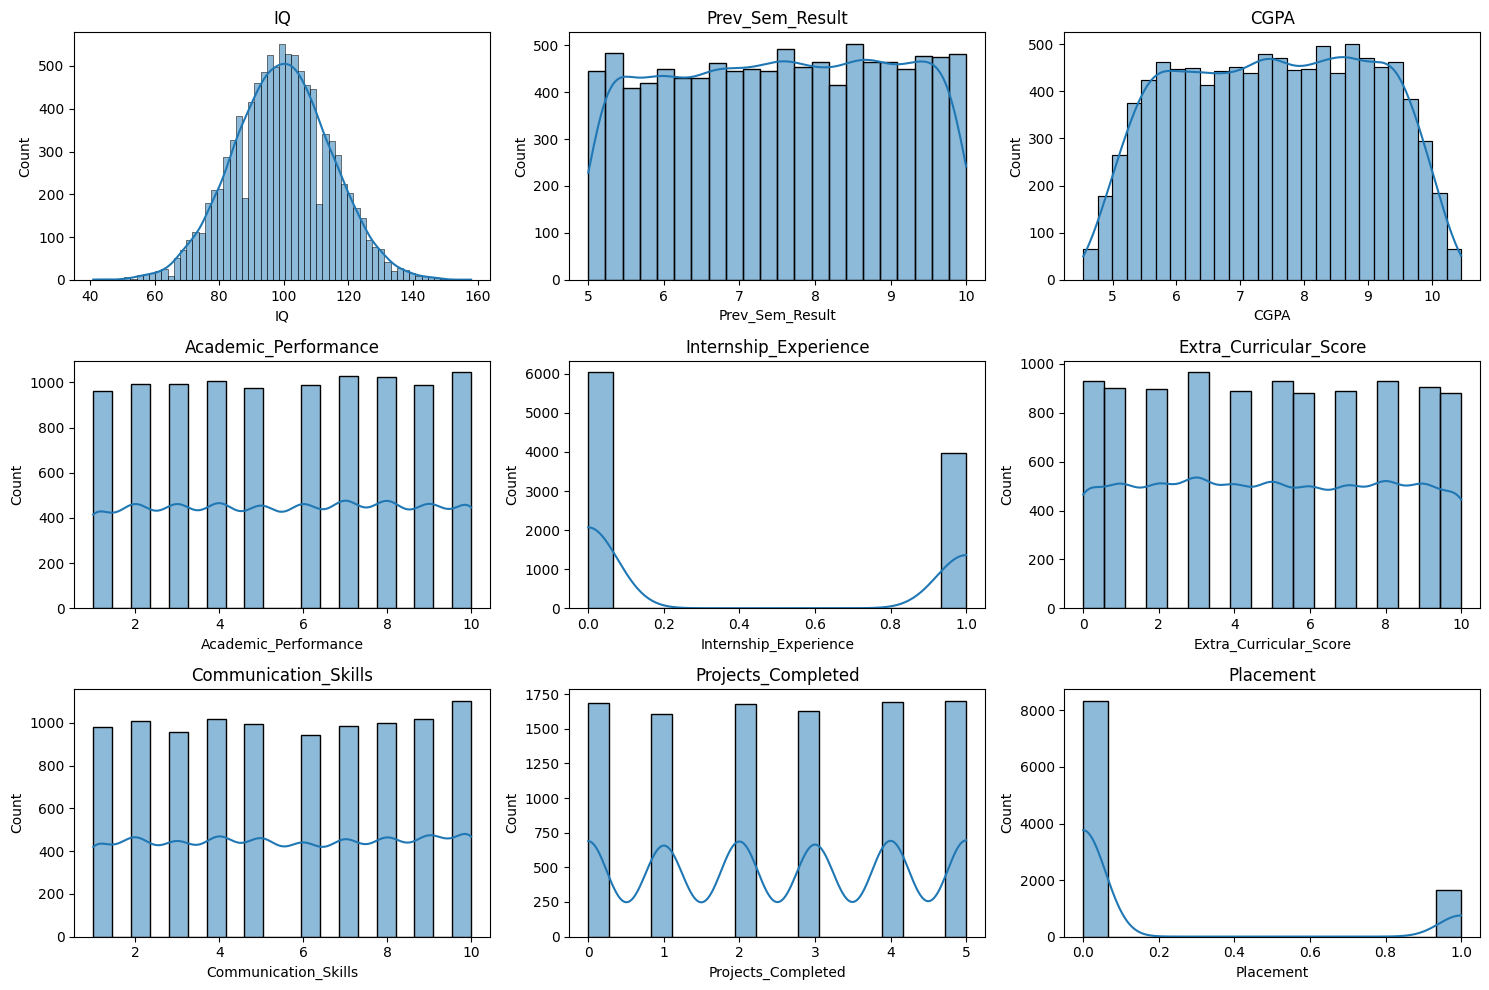

In [41]:
display(df.describe())

import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# **MODEL TRAINING AND EVALUATION**

**Handling Imbalance using Undersampling**

In [42]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

print("Value counts of the target variable after undersampling:")
print(y_undersampled.value_counts())

Value counts of the target variable after undersampling:
Placement
0    1659
1    1659
Name: count, dtype: int64


**Training and Evaluating Models (Undersampled Data)**

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

accuracy_undersampled = {}
precision_undersampled = {}
recall_undersampled = {}
f1_undersampled = {}
auc_roc_undersampled = {}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Performing K-Fold Cross-Validation for {name} on undersampled data...")

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    auc_roc_scores = []

    for train_index, test_index in kf.split(X_undersampled, y_undersampled):
        X_train, X_test = X_undersampled.iloc[train_index], X_undersampled.iloc[test_index]
        y_train, y_test = y_undersampled.iloc[train_index], y_undersampled.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        if y_prob is not None:
            auc_roc_scores.append(roc_auc_score(y_test, y_prob))
        else:
            auc_roc_scores.append(np.nan) # Handle models without predict_proba


    accuracy_undersampled[name] = np.mean(accuracy_scores)
    precision_undersampled[name] = np.mean(precision_scores)
    recall_undersampled[name] = np.mean(recall_scores)
    f1_undersampled[name] = np.mean(f1_scores)
    auc_roc_undersampled[name] = np.mean(auc_roc_scores)


    print(f"Mean Accuracy for {name}: {accuracy_undersampled[name]:.4f}")
    print(f"Mean Precision for {name}: {precision_undersampled[name]:.4f}")
    print(f"Mean Recall for {name}: {recall_undersampled[name]:.4f}")
    print(f"Mean F1-score for {name}: {f1_undersampled[name]:.4f}")
    print(f"Mean AUC-ROC for {name}: {auc_roc_undersampled[name]:.4f}\n")

print("Mean Accuracy (Undersampled Data):")
print(accuracy_undersampled)
print("\nMean Precision (Undersampled Data):")
print(precision_undersampled)
print("\nMean Recall (Undersampled Data):")
print(recall_undersampled)
print("\nMean F1-score (Undersampled Data):")
print(f1_undersampled)
print("\nMean AUC-ROC (Undersampled Data):")
print(auc_roc_undersampled)

Performing K-Fold Cross-Validation for SVC on undersampled data...
Mean Accuracy for SVC: 0.8565
Mean Precision for SVC: 0.8290
Mean Recall for SVC: 0.9000
Mean F1-score for SVC: 0.8628
Mean AUC-ROC for SVC: nan

Performing K-Fold Cross-Validation for KNeighborsClassifier on undersampled data...
Mean Accuracy for KNeighborsClassifier: 0.8927
Mean Precision for KNeighborsClassifier: 0.8413
Mean Recall for KNeighborsClassifier: 0.9687
Mean F1-score for KNeighborsClassifier: 0.9004
Mean AUC-ROC for KNeighborsClassifier: 0.9584

Performing K-Fold Cross-Validation for LogisticRegression on undersampled data...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Accuracy for LogisticRegression: 0.8595
Mean Precision for LogisticRegression: 0.8474
Mean Recall for LogisticRegression: 0.8776
Mean F1-score for LogisticRegression: 0.8621
Mean AUC-ROC for LogisticRegression: 0.9362

Performing K-Fold Cross-Validation for DecisionTreeClassifier on undersampled data...
Mean Accuracy for DecisionTreeClassifier: 0.9997
Mean Precision for DecisionTreeClassifier: 0.9994
Mean Recall for DecisionTreeClassifier: 1.0000
Mean F1-score for DecisionTreeClassifier: 0.9997
Mean AUC-ROC for DecisionTreeClassifier: 0.9997

Performing K-Fold Cross-Validation for RandomForestClassifier on undersampled data...
Mean Accuracy for RandomForestClassifier: 0.9994
Mean Precision for RandomForestClassifier: 0.9988
Mean Recall for RandomForestClassifier: 1.0000
Mean F1-score for RandomForestClassifier: 0.9994
Mean AUC-ROC for RandomForestClassifier: 1.0000

Performing K-Fold Cross-Validation for GradientBoostingClassifier on undersampled data...
Mean Accuracy for Gradient

**Handling Imbalance using SMOTE**

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Value counts of the target variable after applying SMOTE:")
print(y_smote.value_counts())

Value counts of the target variable after applying SMOTE:
Placement
0    8341
1    8341
Name: count, dtype: int64


**Training and Evaluating Models (SMOTE Data)**

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

accuracy_smote = {}
precision_smote = {}
recall_smote = {}
f1_smote = {}
auc_roc_smote = {}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Performing K-Fold Cross-Validation for {name} on SMOTE-balanced data...")

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    auc_roc_scores = []

    for train_index, test_index in kf.split(X_smote, y_smote):
        X_train, X_test = X_smote.iloc[train_index], X_smote.iloc[test_index]
        y_train, y_test = y_smote.iloc[train_index], y_smote.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        if y_prob is not None:
            auc_roc_scores.append(roc_auc_score(y_test, y_prob))
        else:
            auc_roc_scores.append(np.nan)


    accuracy_smote[name] = np.mean(accuracy_scores)
    precision_smote[name] = np.mean(precision_scores)
    recall_smote[name] = np.mean(recall_scores)
    f1_smote[name] = np.mean(f1_scores)
    auc_roc_smote[name] = np.mean(auc_roc_scores)


    print(f"Mean Accuracy for {name}: {accuracy_smote[name]:.4f}")
    print(f"Mean Precision for {name}: {precision_smote[name]:.4f}")
    print(f"Mean Recall for {name}: {recall_smote[name]:.4f}")
    print(f"Mean F1-score for {name}: {f1_smote[name]:.4f}")
    print(f"Mean AUC-ROC for {name}: {auc_roc_smote[name]:.4f}\n")

print("Mean Accuracy (SMOTE-balanced Data):")
print(accuracy_smote)
print("\nMean Precision (SMOTE-balanced Data):")
print(precision_smote)
print("\nMean Recall (SMOTE-balanced Data):")
print(recall_smote)
print("\nMean F1-score (SMOTE-balanced Data):")
print(f1_smote)
print("\nMean AUC-ROC (SMOTE-balanced Data):")
print(auc_roc_smote)

Performing K-Fold Cross-Validation for SVC on SMOTE-balanced data...
Mean Accuracy for SVC: 0.8729
Mean Precision for SVC: 0.8345
Mean Recall for SVC: 0.9302
Mean F1-score for SVC: 0.8798
Mean AUC-ROC for SVC: nan

Performing K-Fold Cross-Validation for KNeighborsClassifier on SMOTE-balanced data...
Mean Accuracy for KNeighborsClassifier: 0.9382
Mean Precision for KNeighborsClassifier: 0.8910
Mean Recall for KNeighborsClassifier: 0.9986
Mean F1-score for KNeighborsClassifier: 0.9417
Mean AUC-ROC for KNeighborsClassifier: 0.9830

Performing K-Fold Cross-Validation for LogisticRegression on SMOTE-balanced data...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean Accuracy for LogisticRegression: 0.8502
Mean Precision for LogisticRegression: 0.8372
Mean Recall for LogisticRegression: 0.8694
Mean F1-score for LogisticRegression: 0.8530
Mean AUC-ROC for LogisticRegression: 0.9321

Performing K-Fold Cross-Validation for DecisionTreeClassifier on SMOTE-balanced data...
Mean Accuracy for DecisionTreeClassifier: 0.9955
Mean Precision for DecisionTreeClassifier: 0.9947
Mean Recall for DecisionTreeClassifier: 0.9963
Mean F1-score for DecisionTreeClassifier: 0.9955
Mean AUC-ROC for DecisionTreeClassifier: 0.9955

Performing K-Fold Cross-Validation for RandomForestClassifier on SMOTE-balanced data...
Mean Accuracy for RandomForestClassifier: 0.9969
Mean Precision for RandomForestClassifier: 0.9988
Mean Recall for RandomForestClassifier: 0.9951
Mean F1-score for RandomForestClassifier: 0.9969
Mean AUC-ROC for RandomForestClassifier: 0.9999

Performing K-Fold Cross-Validation for GradientBoostingClassifier on SMOTE-balanced data...
Mean Accuracy for Gr

**Scaling the Initial Dataset**

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

display(X_scaled.head())

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,0.500135,-0.639521,-0.851919,0.853921,-0.810387,0.958593,0.840550,0.866381
1,-0.164214,-1.392572,-1.470939,0.853921,-0.810387,0.642131,0.840550,-1.464794
2,0.633004,-1.503111,-1.158028,1.201949,-0.810387,-0.623713,-1.572644,-0.882000
3,1.496657,-1.427115,-1.212447,0.157865,1.233979,-1.256636,0.151066,-0.882000
4,-0.230648,0.258612,0.107220,0.505893,-0.810387,0.958593,1.530034,-0.299206


**Handle imbalance with undersampling (Scaled Data)**

In [48]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_undersampled_scaled, y_undersampled_scaled = rus.fit_resample(X_scaled, y)

print("Value counts of the target variable after undersampling scaled data:")
print(y_undersampled_scaled.value_counts())

Value counts of the target variable after undersampling scaled data:
Placement
0    1659
1    1659
Name: count, dtype: int64


**Evaluating models (Scaled Undersampled Data)**

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

accuracy_undersampled_scaled = {}
precision_undersampled_scaled = {}
recall_undersampled_scaled = {}
f1_undersampled_scaled = {}
auc_roc_undersampled_scaled = {}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Performing K-Fold Cross-Validation for {name} on scaled undersampled data...")

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    auc_roc_scores = []

    for train_index, test_index in kf.split(X_undersampled_scaled, y_undersampled_scaled):
        X_train, X_test = X_undersampled_scaled.iloc[train_index], X_undersampled_scaled.iloc[test_index]
        y_train, y_test = y_undersampled_scaled.iloc[train_index], y_undersampled_scaled.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None


        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        if y_prob is not None:
            auc_roc_scores.append(roc_auc_score(y_test, y_prob))
        else:
            auc_roc_scores.append(np.nan)


    accuracy_undersampled_scaled[name] = np.mean(accuracy_scores)
    precision_undersampled_scaled[name] = np.mean(precision_scores)
    recall_undersampled_scaled[name] = np.mean(recall_scores)
    f1_undersampled_scaled[name] = np.mean(f1_scores)
    auc_roc_undersampled_scaled[name] = np.mean(auc_roc_scores)


    print(f"Mean Accuracy for {name}: {accuracy_undersampled_scaled[name]:.4f}")
    print(f"Mean Precision for {name}: {precision_undersampled_scaled[name]:.4f}")
    print(f"Mean Recall for {name}: {recall_undersampled_scaled[name]:.4f}")
    print(f"Mean F1-score for {name}: {f1_undersampled_scaled[name]:.4f}")
    print(f"Mean AUC-ROC for {name}: {auc_roc_undersampled_scaled[name]:.4f}\n")

print("Mean Accuracy (Scaled Undersampled Data):")
print(accuracy_undersampled_scaled)
print("\nMean Precision (Scaled Undersampled Data):")
print(precision_undersampled_scaled)
print("\nMean Recall (Scaled Undersampled Data):")
print(recall_undersampled_scaled)
print("\nMean F1-score (Scaled Undersampled Data):")
print(f1_undersampled_scaled)
print("\nMean AUC-ROC (Scaled Undersampled Data):")
print(auc_roc_undersampled_scaled)

Performing K-Fold Cross-Validation for SVC on scaled undersampled data...
Mean Accuracy for SVC: 0.9343
Mean Precision for SVC: 0.9071
Mean Recall for SVC: 0.9681
Mean F1-score for SVC: 0.9365
Mean AUC-ROC for SVC: nan

Performing K-Fold Cross-Validation for KNeighborsClassifier on scaled undersampled data...
Mean Accuracy for KNeighborsClassifier: 0.9132
Mean Precision for KNeighborsClassifier: 0.8696
Mean Recall for KNeighborsClassifier: 0.9723
Mean F1-score for KNeighborsClassifier: 0.9180
Mean AUC-ROC for KNeighborsClassifier: 0.9667

Performing K-Fold Cross-Validation for LogisticRegression on scaled undersampled data...
Mean Accuracy for LogisticRegression: 0.8617
Mean Precision for LogisticRegression: 0.8544
Mean Recall for LogisticRegression: 0.8722
Mean F1-score for LogisticRegression: 0.8631
Mean AUC-ROC for LogisticRegression: 0.9408

Performing K-Fold Cross-Validation for DecisionTreeClassifier on scaled undersampled data...
Mean Accuracy for DecisionTreeClassifier: 0.9997


**Handling imbalance with SMOTE (Scaled Data)**

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote_scaled, y_smote_scaled = smote.fit_resample(X_scaled, y)

print("Value counts of the target variable after applying SMOTE on scaled data:")
print(y_smote_scaled.value_counts())

Value counts of the target variable after applying SMOTE on scaled data:
Placement
0    8341
1    8341
Name: count, dtype: int64


**Evaluating models (Scaled SMOTE Data)**

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

accuracy_smote_scaled = {}
precision_smote_scaled = {}
recall_smote_scaled = {}
f1_smote_scaled = {}
auc_roc_smote_scaled = {}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Performing K-Fold Cross-Validation for {name} on scaled SMOTE-balanced data...")

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    auc_roc_scores = []

    for train_index, test_index in kf.split(X_smote_scaled, y_smote_scaled):
        X_train, X_test = X_smote_scaled.iloc[train_index], X_smote_scaled.iloc[test_index]
        y_train, y_test = y_smote_scaled.iloc[train_index], y_smote_scaled.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None


        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        if y_prob is not None:
            auc_roc_scores.append(roc_auc_score(y_test, y_prob))
        else:
            auc_roc_scores.append(np.nan)


    accuracy_smote_scaled[name] = np.mean(accuracy_scores)
    precision_smote_scaled[name] = np.mean(precision_scores)
    recall_smote_scaled[name] = np.mean(recall_scores)
    f1_smote_scaled[name] = np.mean(f1_scores)
    auc_roc_smote_scaled[name] = np.mean(auc_roc_scores)


    print(f"Mean Accuracy for {name}: {accuracy_smote_scaled[name]:.4f}")
    print(f"Mean Precision for {name}: {precision_smote_scaled[name]:.4f}")
    print(f"Mean Recall for {name}: {recall_smote_scaled[name]:.4f}")
    print(f"Mean F1-score for {name}: {f1_smote_scaled[name]:.4f}")
    print(f"Mean AUC-ROC for {name}: {auc_roc_smote_scaled[name]:.4f}\n")

print("Mean Accuracy (Scaled SMOTE-balanced Data):")
print(accuracy_smote_scaled)
print("\nMean Precision (Scaled SMOTE-balanced Data):")
print(precision_smote_scaled)
print("\nMean Recall (Scaled SMOTE-balanced Data):")
print(recall_smote_scaled)
print("\nMean F1-score (Scaled SMOTE-balanced Data):")
print(f1_smote_scaled)
print("\nMean AUC-ROC (Scaled SMOTE-balanced Data):")
print(auc_roc_smote_scaled)

Performing K-Fold Cross-Validation for SVC on scaled SMOTE-balanced data...
Mean Accuracy for SVC: 0.9597
Mean Precision for SVC: 0.9345
Mean Recall for SVC: 0.9886
Mean F1-score for SVC: 0.9608
Mean AUC-ROC for SVC: nan

Performing K-Fold Cross-Validation for KNeighborsClassifier on scaled SMOTE-balanced data...
Mean Accuracy for KNeighborsClassifier: 0.9505
Mean Precision for KNeighborsClassifier: 0.9119
Mean Recall for KNeighborsClassifier: 0.9975
Mean F1-score for KNeighborsClassifier: 0.9528
Mean AUC-ROC for KNeighborsClassifier: 0.9876

Performing K-Fold Cross-Validation for LogisticRegression on scaled SMOTE-balanced data...
Mean Accuracy for LogisticRegression: 0.8653
Mean Precision for LogisticRegression: 0.8542
Mean Recall for LogisticRegression: 0.8809
Mean F1-score for LogisticRegression: 0.8674
Mean AUC-ROC for LogisticRegression: 0.9439

Performing K-Fold Cross-Validation for DecisionTreeClassifier on scaled SMOTE-balanced data...
Mean Accuracy for DecisionTreeClassifier:

**Comparing all the models**

In [52]:
performance_data_all = []

for name in models.keys():
    # Unscaled Undersampled
    performance_data_all.append({
        'Model': name,
        'Balancing Strategy': 'Undersampled (Unscaled)',
        'Mean Accuracy': accuracy_undersampled.get(name, np.nan),
        'Mean Precision': precision_undersampled.get(name, np.nan),
        'Mean Recall': recall_undersampled.get(name, np.nan),
        'Mean F1-score': f1_undersampled.get(name, np.nan),
        'Mean AUC-ROC': auc_roc_undersampled.get(name, np.nan)
    })
    # Scaled Undersampled
    performance_data_all.append({
        'Model': name,
        'Balancing Strategy': 'Undersampled (Scaled)',
        'Mean Accuracy': accuracy_undersampled_scaled.get(name, np.nan),
        'Mean Precision': precision_undersampled_scaled.get(name, np.nan),
        'Mean Recall': recall_undersampled_scaled.get(name, np.nan),
        'Mean F1-score': f1_undersampled_scaled.get(name, np.nan),
        'Mean AUC-ROC': auc_roc_undersampled_scaled.get(name, np.nan)
    })
    # Unscaled SMOTE
    performance_data_all.append({
        'Model': name,
        'Balancing Strategy': 'SMOTE (Unscaled)',
        'Mean Accuracy': accuracy_smote.get(name, np.nan),
        'Mean Precision': precision_smote.get(name, np.nan),
        'Mean Recall': recall_smote.get(name, np.nan),
        'Mean F1-score': f1_smote.get(name, np.nan),
        'Mean AUC-ROC': auc_roc_smote.get(name, np.nan)
    })
    # Scaled SMOTE
    performance_data_all.append({
        'Model': name,
        'Balancing Strategy': 'SMOTE (Scaled)',
        'Mean Accuracy': accuracy_smote_scaled.get(name, np.nan),
        'Mean Precision': precision_smote_scaled.get(name, np.nan),
        'Mean Recall': recall_smote_scaled.get(name, np.nan),
        'Mean F1-score': f1_smote_scaled.get(name, np.nan),
        'Mean AUC-ROC': auc_roc_smote_scaled.get(name, np.nan)
    })

performance_comparison_all_df = pd.DataFrame(performance_data_all)

display(performance_comparison_all_df)

,Model,Balancing Strategy,Mean Accuracy,Mean Precision,Mean Recall,Mean F1-score,Mean AUC-ROC
0,SVC,Undersampled (Unscaled),0.856531,0.829018,0.899953,0.862803,NaN
1,SVC,Undersampled (Scaled),0.934293,0.907143,0.968061,0.936505,NaN
2,SVC,SMOTE (Unscaled),0.872857,0.834507,0.930225,0.879751,NaN
3,SVC,SMOTE (Scaled),0.959657,0.934527,0.988610,0.960800,NaN
4,KNeighborsClassifier,Undersampled (Unscaled),0.892702,0.841331,0.968664,0.900388,0.958443
5,KNeighborsClassifier,Undersampled (Scaled),0.913201,0.869578,0.972284,0.918018,0.966698
6,KNeighborsClassifier,SMOTE (Unscaled),0.938197,0.891031,0.998561,0.941728,0.983049
7,KNeighborsClassifier,SMOTE (Scaled),0.950546,0.911936,0.997483,0.952780,0.987557
8,LogisticRegression,Undersampled (Unscaled),0.859550,0.847410,0.877647,0.862053,0.936156
9,LogisticRegression,Undersampled (Scaled),0.861659,0.854359,0.872224,0.863085,0.940751
